In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Define the constant file path
FILE_PATH = "laptop_price - dataset.csv"

### 1. Load and setup the data

In [277]:
def setup_data(file_path):
    """
    Loads the dataset and initializes plotting settings.
    Returns the DataFrame.
    """
    df = pd.read_csv(file_path)
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 6))
    return df

In [278]:
# Call the function and display the first 5 rows of the dataset.
df = setup_data(FILE_PATH)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


<Figure size 1200x600 with 0 Axes>

### 2. Plot the price of all the laptops

In [279]:
def price_distribution(df):
    """
    Plots a histogram to visualize the overall distribution of laptop prices.
    """
    plt.figure(figsize=(12, 6))
    sns.histplot(df['Price (Euro)'], bins = 30, kde = False)
    plt.title('Distribution of Laptop Prices')
    plt.xlabel('Price (Euro)')
    plt.ylabel('Number of Laptops')
    plt.show()

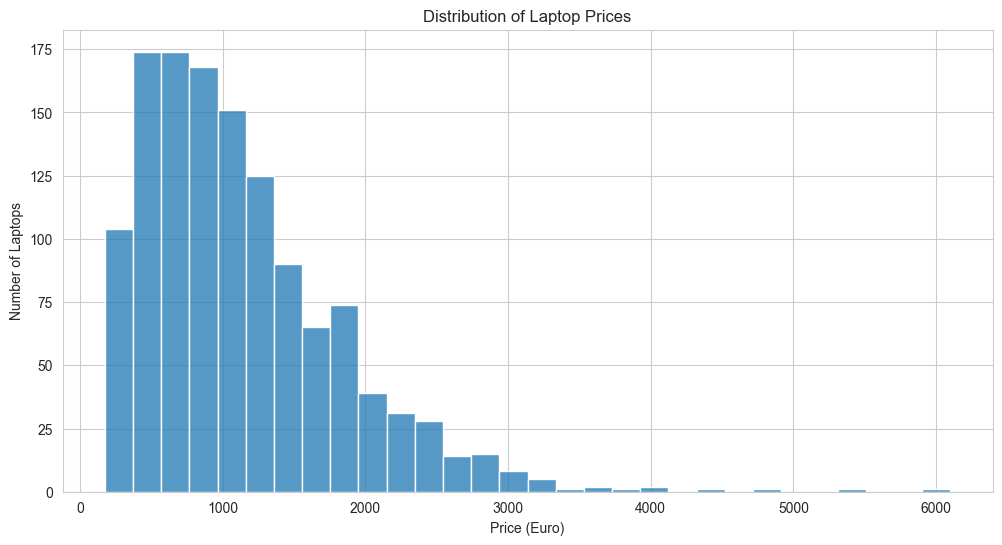

In [280]:
price_distribution(df)

### 3. Which company has on average the most expensive laptop? What is the average laptop price for each company?

In [281]:
def price_by_company(df):
    """
    Calculates the average laptop price for each company and identifies the most expensive one.
    """
    avg_price_by_company = df.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False)
    
    # Find the company with the highest average price
    most_exp_company = avg_price_by_company.index[0]
    most_exp_price = avg_price_by_company.iloc[0]
    
    print("\nAverage Price By Company (descending order)\n")
    print(avg_price_by_company)
    print(f"\nThe company with the highest average laptop price is: {most_exp_company} ({most_exp_price:.2f} Euro).")

In [282]:
price_by_company(df)


Average Price By Company (descending order)

Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64

The company with the highest average laptop price is: Razer (3346.14 Euro).


### 4. Find the different types of Operating systems present in the data - under the column name "OpSys".
*Unifying operating systems that are written differently but representing the same system*

In [283]:
def unite_opsys(df):
    """
    Cleans and unifies the operating system names in the 'OpSys' column.
    Returns the updated DataFrame.
    """
    print("Operation Systems Before Unifying:")
    print(df['OpSys'].value_counts())
    
    # Unifying 'Mac OS X' and 'Windows 10 S' to standard names
    df.loc[df['OpSys'] == 'Mac OS X', 'OpSys'] = 'macOS'
    df.loc[df['OpSys'] == 'Windows 10 S', 'OpSys'] = 'Windows 10'
    
    print("\nOperation Systems After Unifying:")
    print(df['OpSys'].value_counts())
    
    return df

In [284]:
df = unite_opsys(df)

Operation Systems Before Unifying:
OpSys
Windows 10      1048
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

Operation Systems After Unifying:
OpSys
Windows 10    1056
No OS           66
Linux           58
Windows 7       45
Chrome OS       27
macOS           21
Android          2
Name: count, dtype: int64


### 5. Plot for each of the operating system types the distribution of the prices, so that the number of plots equals to the number of unique operating systems.

In [285]:
def plot_opsys(df):
    """
    Plots the price distribution for each OS using a Box Plot, ordered by median price.
    This fulfills the requirement of having one plot element per unique OS.
    """
    
    # Calculate the plot order based on descending median price.
    median_price_OS = df.groupby('OpSys')['Price (Euro)'].median().sort_values(ascending=False).index
    plt.figure(figsize=(12, 6))
    
    # Using a Box Plot to show the distribution of each OS.
    sns.boxplot(
        data=df, 
        x='OpSys', 
        y='Price (Euro)', 
        order=median_price_OS, 
        hue='OpSys', 
        palette='Set1', 
        legend=False
    )
    plt.title('Distribution of Laptop Prices by Operating System')
    plt.xlabel('Operating System')
    plt.ylabel('Price (Euro)')
    plt.show()

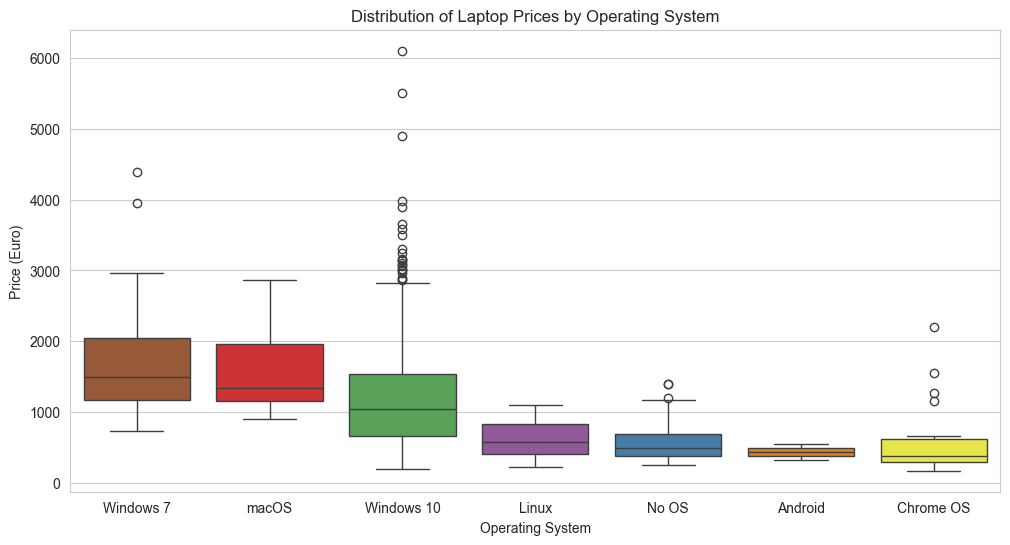

In [286]:
plot_opsys(df)

### 6. What is the relationship between RAM and computer price? add an adequate plot to support your findings.
check data for outliers, what would be considered as an outlier? How will you detect it?

I expect the correlation to be close to 1 (meaning- almost linear).
The expected graph will have a positive slope, with a value close to 1.

Outliers will be detected using zscore.

In [287]:
def ram_vs_price(df):
    """
    Visualizes the relationship between RAM size and price using a Box Plot.
    (Box plots also implicitly show outliers based on the 1.5*IQR rule).
    """
    
    # Ensure RAM categories are sorted numerically
    ram_sorted = sorted(df['RAM (GB)'].unique())
    spearman_corr = df["RAM (GB)"].corr(df["Price (Euro)"], method="spearman")
    print("Spearman correlation between RAM and price is: ", spearman_corr)
    plt.figure(figsize=(12, 6))
    
    # Box Plot visualization to best show outliers.
    sns.boxplot(
        data=df, 
        x='RAM (GB)', 
        y='Price (Euro)', 
        order=ram_sorted, 
        hue='RAM (GB)', 
        palette='viridis', 
        legend=False
    )
    plt.title('Relationship between RAM and Laptop Price')
    plt.xlabel('RAM (GB)')
    plt.ylabel('Price (Euro)')
    plt.show()
    
    # Using zscore to detect outliers.
    df["z_score"] = zscore(df["Price (Euro)"])

    outliers = df[abs(df["z_score"]) > 3] # Values beyond 3 s.d from the mean are the outliers.
    sorted_outliers = outliers[["RAM (GB)", "Price (Euro)", "z_score"]].sort_values(by=['RAM (GB)'], ascending=[False])

    print("\nOutliers based on z score:")
    print(sorted_outliers)    

Spearman correlation between RAM and price is:  0.7642484695916761


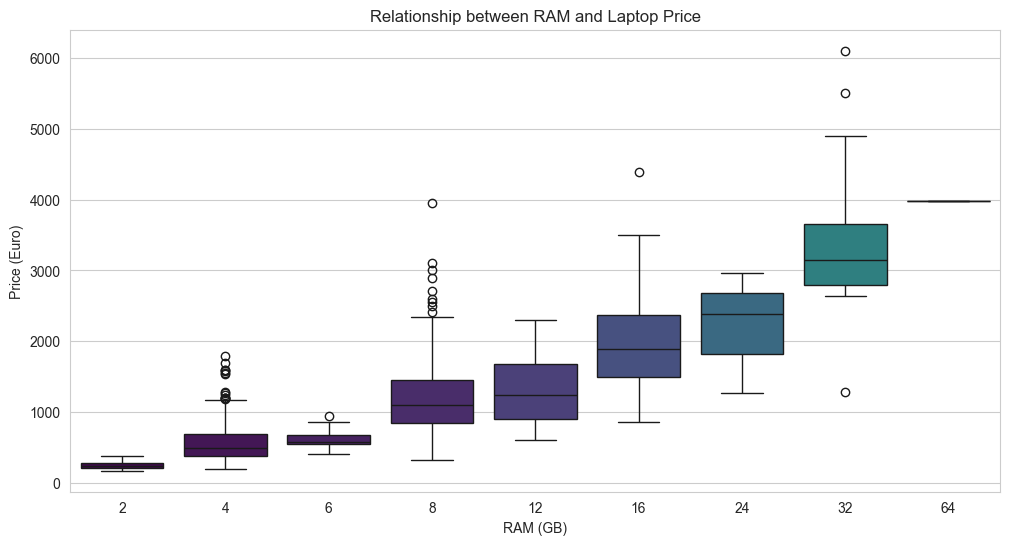


Outliers based on z score:
      RAM (GB)  Price (Euro)   z_score
1066        64        3975.0  4.054421
196         32        6099.0  7.086637
238         32        3890.0  3.933075
610         32        4899.0  5.373520
723         32        3659.4  3.603871
780         32        3588.8  3.503082
830         32        5499.0  6.230079
1081        32        3240.0  3.005137
744         16        3299.0  3.089365
749         16        4389.0  4.645446
1231        16        3499.0  3.374884
1136         8        3949.4  4.017874


In [288]:
ram_vs_price(df)

### 7. Create a new column for the dataframe called "Storage type" that extracts the storage type from the column "Memory".

In [289]:
def storage_type(df):
    """
    Extracts the storage type from the 'Memory' column using Regex for feature engineering.
    Returns the updated DataFrame.
    """
    # 1. Primary extraction using Regex to capture storage type names
    df['Storage type'] = df['Memory'].str.extract(r'(\w+ Storage|\w+ Hybrid|\w+ SSD|\w+ HDD)', expand=False)
    
    # 2. Cleaning: Remove size units (e.g., '1TB ', '500GB ') that might have been captured
    df['Storage type'] = df['Storage type'].str.replace(r'^\d+\s*(GB|TB)\s*', '', regex=True)
    
    # 3. Handle 'Multi-Type' storage (e.g., 'SSD + HDD')
    df['Storage type'] = np.where(df['Memory'].str.contains(r'\+'), 'Multi-Type', df['Storage type'])
    print(df['Storage type'].value_counts())
    
    return df


In [290]:
df = storage_type(df)
print("\nUpdated Data:")
df

Storage type
SSD              631
HDD              358
Multi-Type       208
Flash Storage     70
Hybrid             8
Name: count, dtype: int64

Updated Data:


,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),z_score,Storage type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,0.292259,SSD
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94,-0.336954,Flash Storage
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00,-0.799410,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45,2.002178,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60,0.954536,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.5,4,128GB SSD,Intel,HD Graphics 520,Windows 10,1.80,638.00,-0.709472,SSD
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.5,16,512GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1499.00,0.519690,SSD
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel,Celeron Dual Core N3050,1.6,2,64GB Flash Storage,Intel,HD Graphics,Windows 10,1.50,229.00,-1.293359,Flash Storage
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,6,1TB HDD,AMD,Radeon R5 M330,Windows 10,2.19,764.00,-0.529594,HDD
